In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import neurokit2 as nk
from biosppy import utils
from biosppy.signals import ecg
import torch

In [45]:
Attributes = pd.read_excel('ECG_Data/AttributesDictionary.xlsx')
Conditions = pd.read_excel('ECG_Data/ConditionNames.xlsx')
Rhythms = pd.read_excel('ECG_Data/RhythmNames.xlsx')
Diagnostics = pd.read_excel('ECG_Data/Diagnostics.xlsx')
channels = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

In [149]:
# Load data with numpy
data_dir = 'ECG_Data/Denoised'
patients = os.listdir(data_dir)
patient = patients[0]
patient = pd.read_csv(os.path.join(data_dir, patient), header=None, names=channels)
#patient = np.loadtxt(os.path.join(data_dir, patient), delimiter=',')
# With Pandas
#patient = pd.read_csv('ECG_Data/Denoised/MUSE_20180111_165520_97000.csv')#, header=channels)
#patient = patient.to_numpy()

# Process
#signals, info = nk.ecg_process(patient[:,3], sampling_rate=500, method='neurokit')
# ecg_clean(ecg_signal, sampling_rate=1000, method='neurokit', **kwargs)[source]
# rpeaks = info["ECG_R_Peaks"]
# cleaned_ecg = signals["ECG_Clean"]
#plot = nk.events_plot( info["ECG_Q_Peaks"], cleaned_ecg)

# Biossppy process
# x = ecg.ecg (patient[:,2], sampling_rate=500, show=True, interactive=False)

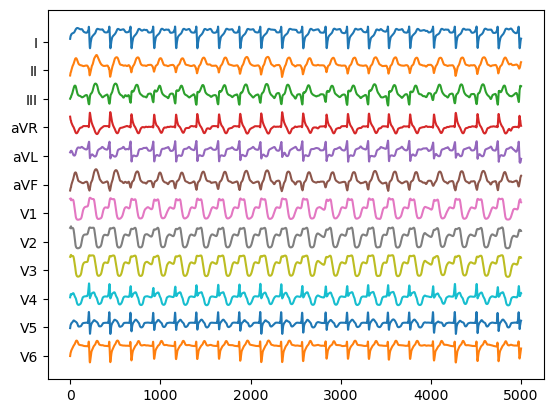

In [150]:
# Plot all events
y_ticks = []

for i, channel in enumerate(channels):
    ecg_ch = patient[channel].to_numpy()
    min_max_ecg = (ecg_ch-np.min(ecg_ch)) / (np.max(ecg_ch)-np.min(ecg_ch)) - 1.3*i
    y_ticks.append(-1.3*i+.3)
    plt.plot(min_max_ecg)

_ = plt.yticks(y_ticks, channels)

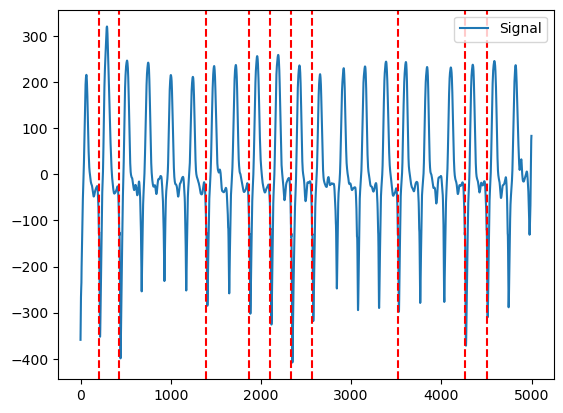

In [151]:
_, rpeaks = nk.ecg_peaks(patient['II'], sampling_rate=500, method='neurokit')
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], patient['II'])
#_, waves_peak = nk.ecg_delineate(x[4][1], rpeaks, sampling_rate=1000, method="peak")
#print(rpeaks)

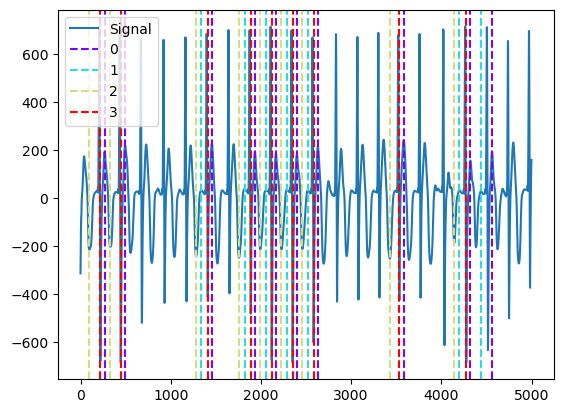

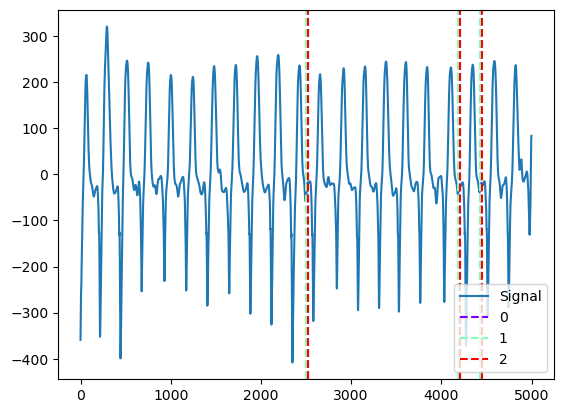

In [153]:
_, waves_peak = nk.ecg_delineate(patient['V5'], rpeaks, sampling_rate=500, method="dwt")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], patient['V5'])


_, waves_peak = nk.ecg_delineate(patient['II'], rpeaks, sampling_rate=500, method="dwt")
plot = nk.events_plot([waves_peak['ECG_P_Peaks'], 
                       waves_peak['ECG_P_Onsets'],
                       waves_peak['ECG_P_Offsets']], 
                       patient['II'])

0.8718636711433788


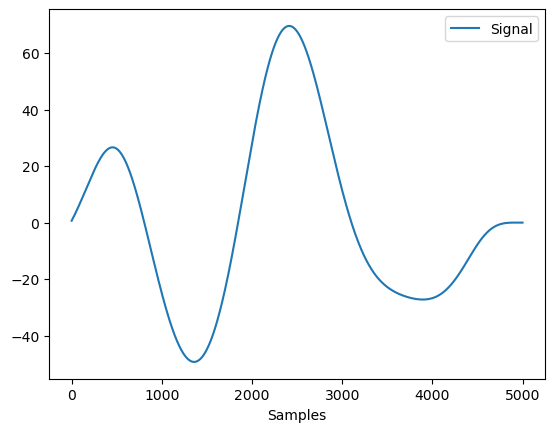

In [199]:
# Add respiratory
ecg_rate = nk.ecg_rate(rpeaks, sampling_rate=500, desired_length=len(patient['II']))# Compute rate
edr = nk.ecg_rsp(ecg_rate, sampling_rate=500) # Analyse EDR


# Visual comparison
nk.signal_plot(edr)
print(np.mean(edr))

In [155]:
waves_peak.keys()
#waves_peak['ECG_P_Onsets']
#peaks = np.array(waves_peak['ECG_R_Onsets'])
#prominences = signal.peak_prominences(patient[1,:], peaks[2])


dict_keys(['ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets'])

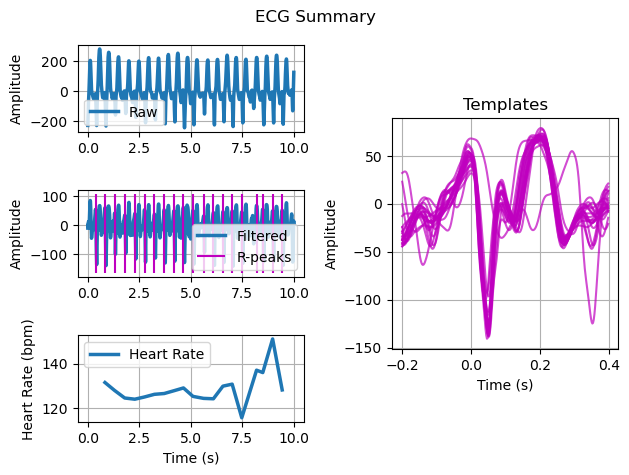

In [181]:
# Biossppy process
outputs = ('ts', 'filtered', 'rpeaks', 'templates_ts', 'templates', 'heart_rate_ts', 'heart_rate')
ecg_proc = utils.ReturnTuple(ecg.ecg(patient['aVF'], sampling_rate=500, show=True, interactive=False), outputs)


In [182]:
biosppy.signals.ecg.getQPositions(ecg_proc, show=False)
#biosppy.signals.ecg.getSPositions(ecg_proc, show=False)
#biosppy.signals.ecg.getTPositions(ecg_proc, show=False)
#biosppy.signals.ecg.kSQI(patient['V5']) #Kurtosis
# Flatline percentage: Percentage of signal where the absolute value of the derivative is lower then the threshold.
#biosppy.signals.ecg.pSQI(patient['V5'], f_thr=0.01) 
#biosppy.signals.ecg.sSQI(patient['V5']) # skewness

([142,
  358,
  628,
  843,
  1085,
  1326,
  1567,
  1800,
  2029,
  2262,
  2496,
  2762,
  2980,
  3243,
  3458,
  3677,
  4061,
  4185,
  4452,
  4663],
 [123,
  347,
  612,
  826,
  1065,
  1303,
  1548,
  1781,
  2013,
  2244,
  2478,
  2746,
  2969,
  3239,
  3453,
  3662,
  4044,
  4169,
  4446,
  4646])

In [177]:
ecg_proc['rpeaks']

array([ 190,  416,  649,  895, 1140, 1376, 1616, 1854, 2088, 2321, 2552,
       2809, 3047, 3279, 3503, 3736, 4095, 4246, 4485, 4717])

In [ ]:
freqs, power = signals.tools.power_spectrum(ecg_signal, 500)
signals.tools.band_power(freqs, power, [20,40])